# Fruits 360

This uses the weight trained in 'fruits.py' to predict the images in the folder fruits/test_images

In [1]:
def no_warn():
    import warnings

    def fxn():
        warnings.warn("deprecated", DeprecationWarning)

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")
        # Trigger a warning.
        fxn()
        # Verify some things
        assert len(w) == 1
        assert issubclass(w[-1].category, DeprecationWarning)
        assert "deprecated" in str(w[-1].message)

In [2]:
from keras.models import load_model
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
no_warn()

Using TensorFlow backend.


Loading the Weight into the model (Weight is a h5 file)

In [3]:
model = load_model('Fruits_360.h5')
no_warn()

The Layout of the model.

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)       

Class to predict the images, you only need to call the function read_images to read the iamges, and then the predict funciton.

In [5]:
class Fruit:
    
    def __init__(self, img_dir = ''):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = load_model('Fruits_360.h5')
        self.Label_dict = labels =  {'Apple Braeburn': 0,
             'Apple Golden': 1,
             'Apple Granny Smith': 2,
             'Apple Red': 3,
             'Apricot': 4,
             'Avocado': 5,
             'Avocado ripe': 6,
             'Banana': 7,
             'Banana Lady Finger': 8,
             'Banana Red': 9,
             'Cactus fruit': 10,
             'Cantaloupe 1': 11,
             'Cantaloupe 2': 12,
             'Carambula': 13,
             'Cherry 1': 14,
             'Cherry Wax Black': 15,
             'Cherry Wax Red': 16,
             'Cherry Wax Yellow': 17,
             'Chestnut': 18,
             'Clementine': 19,
             'Cocos': 20,
             'Dates': 21,
             'Grape Blue': 22,
             'Grape Pink': 23,
             'Grape White': 24,
             'Grapefruit Pink': 25,
             'Grapefruit White': 26,
             'Guava': 27,
             'Hazelnut': 28,
             'Huckleberry': 29,
             'Kaki': 30,
             'Kiwi': 31,
             'Kumquats': 32,
             'Lemon': 33,
             'Lemon Meyer': 34,
             'Limes': 35,
             'Lychee': 36,
             'Mandarine': 37,
             'Mango': 38,
             'Mangostan': 39,
             'Melon Piel de Sapo': 40,
             'Mulberry': 41,
             'Nectarine': 42,
             'Orange': 43,
             'Papaya': 44,
             'Passion Fruit': 45,
             'Peach': 46,
             'Peach 2': 47,
             'Peach Flat': 48,
             'Pear': 49,
             'Pear Kaiser': 50,
             'Pineapple': 51,
             'Pineapple Mini': 52,
             'Pitahaya Red': 53,
             'Plum': 54,
             'Plum 2': 55,
             'Plum 3': 56,
             'Pomegranate': 57,
             'Pomelo Sweetie': 58,
             'Rambutan': 59,
             'Raspberry': 60,
             'Redcurrant': 61,
             'Strawberry': 62,
             'Strawberry Wedge': 63,
             'Tomato 1': 64,
             'Tomato 2': 65,
             'Tomato 4': 66,
             'Tomato Cherry Red': 67,
             'Tomato Maroon': 68,
             'Walnut': 69}
        self.label = list(self.Label_dict.keys())
    
    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 100, 100, 3))
        for i,img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir,img), target_size=(100, 100))
            self.batch_holder[i, :] = img
        return self.batch_holder
    
    def predict(self):
        fig = plt.figure(figsize=(20, 20))
        for i,img in enumerate(self.batch_holder):
            fig.add_subplot(5, 5, i+1)
            result=self.model.predict(self.batch_holder)
            result_classes = result.argmax(axis=-1)
            plt.title(self.label[result_classes[i]])
            plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
            plt.imshow(img/256.)
        plt.show()

Class takes a parameter -> location of  images that needs to be predicted. 

In [6]:
obj = Fruit('fruits//test_images//')

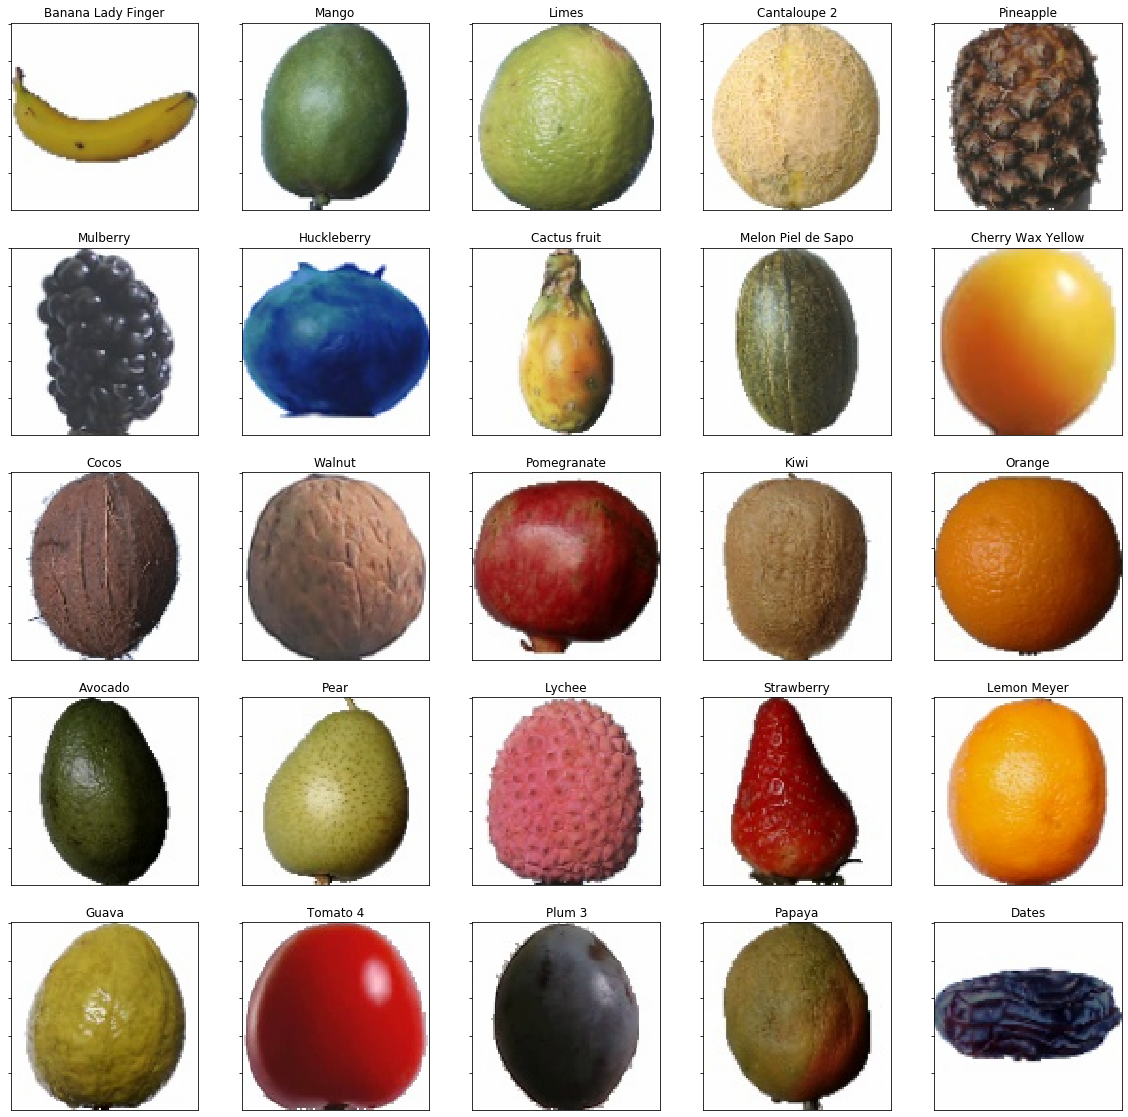

In [7]:
obj.read_images()
obj.predict()